In [1]:
import pandas as pd
import numpy as np

Loading Dataset:

In [2]:
excel_file = "C:/Users/User/Desktop/SEM 7/FYP I/Dataset/DF.xlsx"

df = pd.read_excel(excel_file, sheet_name="Sheet1")

In [3]:
df.head()

,date,ffb_20%_oer,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,avg_temperature,avg_humidity
0,2019-01-01,NaN,NaN,81477,1680891,1737461,3002871,NaN,4.1325,NaN,NaN,32.4,25.666667,95.000000
1,2019-01-02,400.0,20.0,81477,1680891,1737461,3002871,2070.0,4.1370,54.91,28.18,6.0,27.166667,88.458333
2,2019-01-03,402.0,20.1,81477,1680891,1737461,3002871,2090.0,4.1435,55.95,28.43,7.1,27.250000,90.625000
3,2019-01-04,408.0,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,0.0,27.083333,87.333333
4,2019-01-05,NaN,NaN,81477,1680891,1737461,3002871,NaN,NaN,NaN,NaN,3.3,28.625000,86.375000


Check datatypes and null values:

In [4]:
print(df.dtypes)
print(df.isnull().sum())

date                 datetime64[ns]
ffb_20%_oer                 float64
ffb_1%_oer                  float64
import                        int64
export                        int64
production                    int64
end_stock                     int64
cpo_futures                 float64
usd_myr_rate                float64
brent_oil_futures           float64
soybean_futures             float64
precipitation               float64
avg_temperature             float64
avg_humidity                float64
dtype: object
date                   0
ffb_20%_oer          189
ffb_1%_oer           753
import                 0
export                 0
production             0
end_stock              0
cpo_futures          789
usd_myr_rate         712
brent_oil_futures    687
soybean_futures      688
precipitation          0
avg_temperature       62
avg_humidity          62
dtype: int64


In [5]:
df.set_index("date", inplace=True)

In [6]:
df_test1 = df.drop('ffb_20%_oer', axis=1)

In [7]:
df_test1.isnull().sum()

ffb_1%_oer           753
import                 0
export                 0
production             0
end_stock              0
cpo_futures          789
usd_myr_rate         712
brent_oil_futures    687
soybean_futures      688
precipitation          0
avg_temperature       62
avg_humidity          62
dtype: int64

Drop FFB 20% OER Price Column:

In [8]:
df = df.drop('ffb_20%_oer', axis=1)

In [9]:
df.isnull().sum()

ffb_1%_oer           753
import                 0
export                 0
production             0
end_stock              0
cpo_futures          789
usd_myr_rate         712
brent_oil_futures    687
soybean_futures      688
precipitation          0
avg_temperature       62
avg_humidity          62
dtype: int64

In [10]:
df.shape

(2343, 12)

Forward fill null value for ffb price, cpo futures, usd_myr, brent oil, and soybean futures.

In [11]:
cols_to_ffill = [
    "ffb_1%_oer",
    "cpo_futures",
    "usd_myr_rate",
    "brent_oil_futures",
    "soybean_futures"
]

df[cols_to_ffill] = df[cols_to_ffill].fillna(method="ffill")

C:\Users\User\AppData\Local\Temp\ipykernel_22856\3051432306.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cols_to_ffill] = df[cols_to_ffill].fillna(method="ffill")


In [12]:
df.isnull().sum()

ffb_1%_oer            1
import                0
export                0
production            0
end_stock             0
cpo_futures           1
usd_myr_rate          0
brent_oil_futures     1
soybean_futures       1
precipitation         0
avg_temperature      62
avg_humidity         62
dtype: int64

Backfill the first row:

In [13]:
df.fillna(method="bfill", inplace=True, limit=1)

C:\Users\User\AppData\Local\Temp\ipykernel_22856\1571427179.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True, limit=1)


In [14]:
df.isnull().sum()

ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature      60
avg_humidity         60
dtype: int64

Using time interpolation to fill missing temp and humidity value + using monthly mean to fill long gaps:

In [15]:
#time interpolation
df["avg_temperature"] = df["avg_temperature"].interpolate(method="time", limit=7, limit_direction="both")
df["avg_humidity"] = df["avg_humidity"].interpolate(method="time", limit=7, limit_direction="both")


In [16]:
df.isnull().sum()

ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature      32
avg_humidity         32
dtype: int64

In [17]:
#monthly average for gap longer than 7 days
df["avg_temperature"] = df["avg_temperature"].fillna(df.groupby(df.index.month)["avg_temperature"].transform("mean"))
df["avg_humidity"] = df["avg_humidity"].fillna(df.groupby(df.index.month)["avg_humidity"].transform("mean"))

In [18]:
df.isnull().sum()

ffb_1%_oer           0
import               0
export               0
production           0
end_stock            0
cpo_futures          0
usd_myr_rate         0
brent_oil_futures    0
soybean_futures      0
precipitation        0
avg_temperature      0
avg_humidity         0
dtype: int64

Check for data duplication and outliers:

In [19]:
df.duplicated().sum()

np.int64(0)

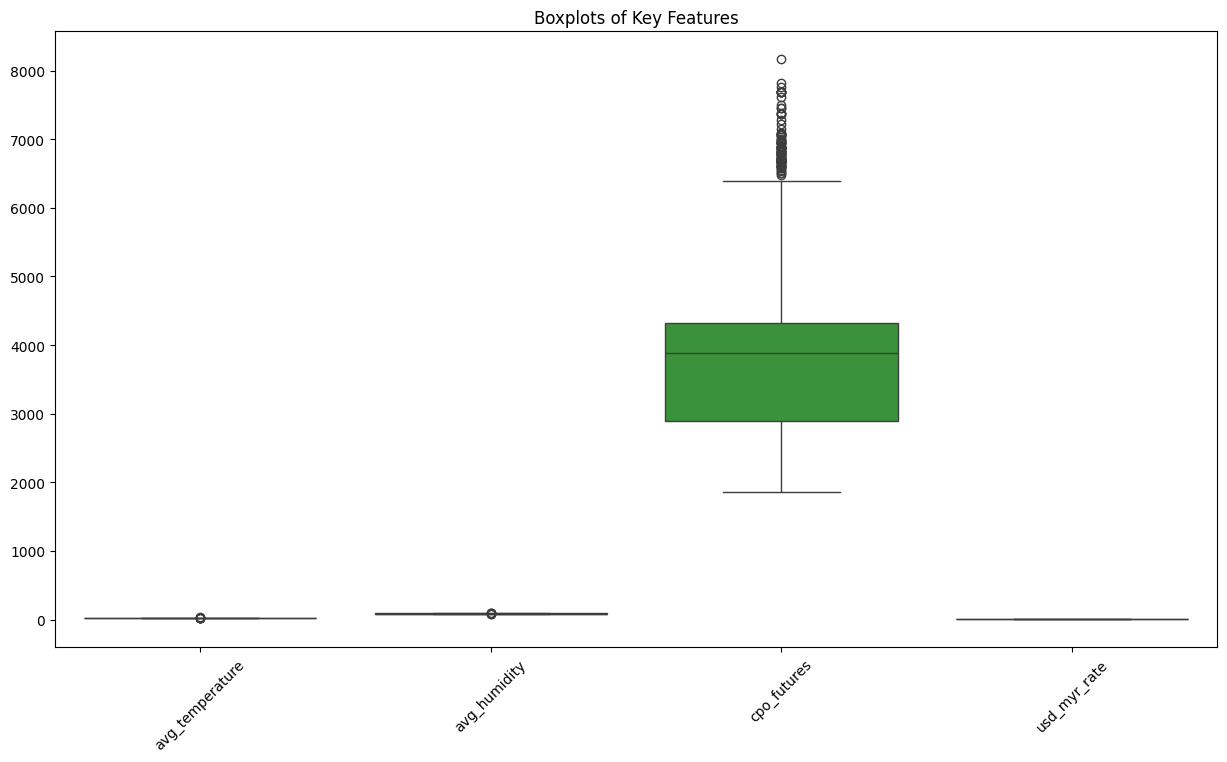

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(data=df[["avg_temperature","avg_humidity","cpo_futures","usd_myr_rate"]])
plt.xticks(rotation=45)
plt.title("Boxplots of Key Features")
plt.show()

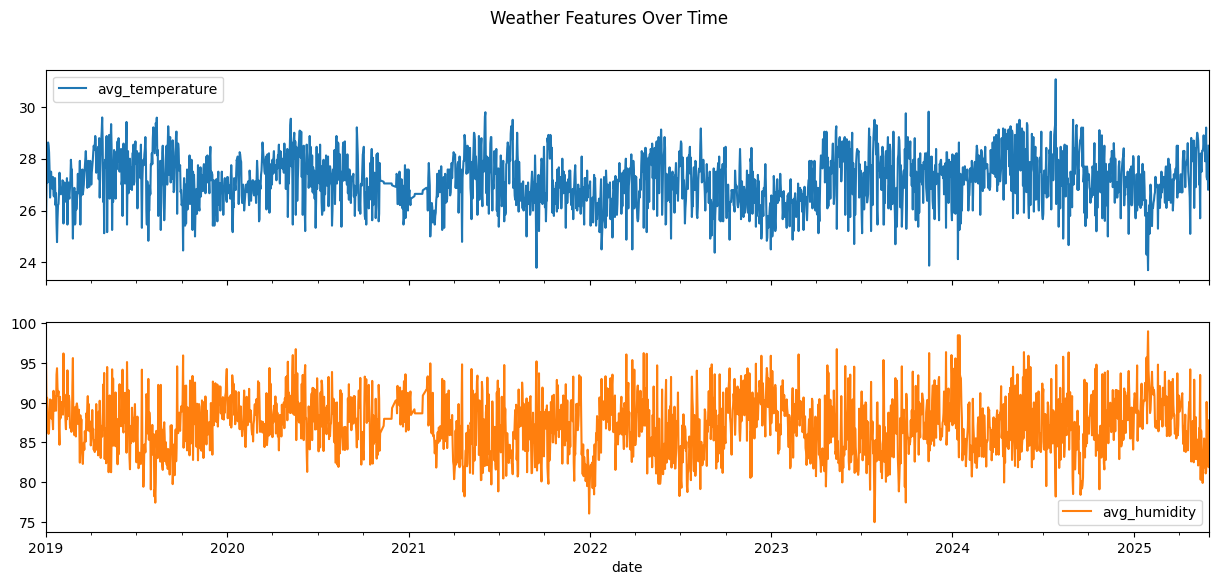

In [21]:
df[["avg_temperature","avg_humidity"]].plot(figsize=(15,6), subplots=True, title="Weather Features Over Time")
plt.show()

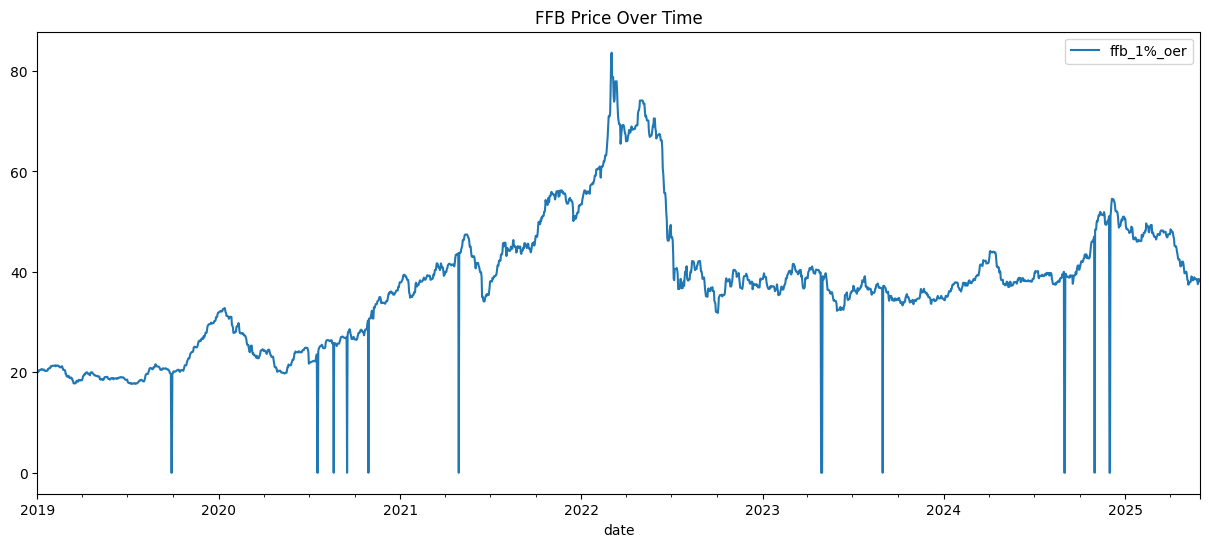

In [22]:
df[["ffb_1%_oer"]].plot(figsize=(15,6), title="FFB Price Over Time")
plt.show()

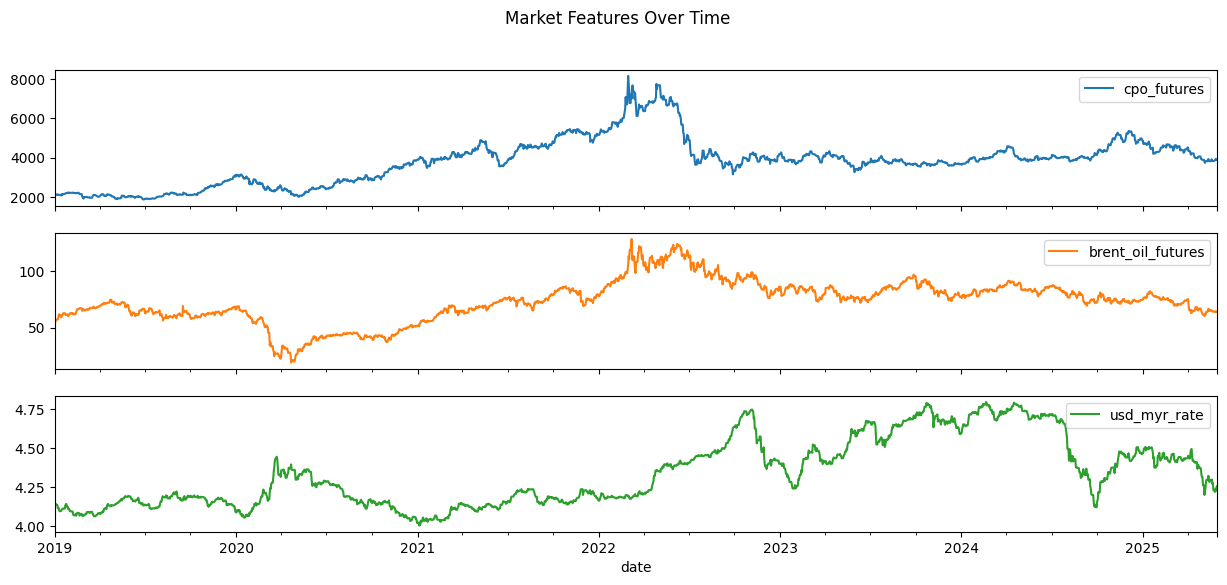

In [23]:
df[["cpo_futures","brent_oil_futures","usd_myr_rate"]].plot(figsize=(15,6), subplots=True, title="Market Features Over Time")
plt.show()

Feature Engineering 
-Lag features (lag_1, lag_3, lag_7)
-Rolling stats (rolling_mean_7, rolling_std_30)
-% changes (pct_change_1, pct_change_7)

In [24]:
#lag features
for lag in [1, 3, 7]:
    df[f"lag_{lag}"] = df["ffb_1%_oer"].shift(lag)


#rolling means
df["rolling_mean_7"] = df["ffb_1%_oer"].rolling(window=7).mean()
df["rolling_mean_30"] = df["ffb_1%_oer"].rolling(window=30).mean()

#rolling std
df["rolling_std_7"] = df["ffb_1%_oer"].rolling(window=7).std()
df["rolling_std_30"] = df["ffb_1%_oer"].rolling(window=30).std()

#pct change
df["pct_change_1"] = df["ffb_1%_oer"].pct_change(periods=1)
df["pct_change_7"] = df["ffb_1%_oer"].pct_change(periods=7)

In [25]:
df.shape

(2343, 21)

In [26]:
df.isnull().sum()

ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature       0
avg_humidity          0
lag_1                 1
lag_3                 3
lag_7                 7
rolling_mean_7        6
rolling_mean_30      29
rolling_std_7         6
rolling_std_30       29
pct_change_1          7
pct_change_7          7
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.head()

,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,...,avg_humidity,lag_1,lag_3,lag_7,rolling_mean_7,rolling_mean_30,rolling_std_7,rolling_std_30,pct_change_1,pct_change_7
date,,,,,,,,,,,,,,,,,,,,,
2019-01-30,21.2,81477,1680891,1737461,3002871,2204.0,4.1075,61.65,30.74,20.6,...,88.041667,21.25,20.85,20.60,20.992857,20.533333,0.212972,0.319032,-0.002353,0.029126
2019-01-31,21.3,81477,1680891,1737461,3002871,2200.0,4.0960,61.89,30.48,47.5,...,90.083333,21.20,21.20,20.75,21.071429,20.576667,0.209875,0.332113,0.004717,0.026506
2019-02-01,21.3,94278,1324615,1544518,3056929,2200.0,4.0960,62.75,30.21,7.0,...,89.958333,21.30,21.25,20.85,21.135714,20.620000,0.199404,0.339015,0.000000,0.021583
2019-02-02,21.3,94278,1324615,1544518,3056929,2200.0,4.0960,62.75,30.21,4.7,...,90.083333,21.30,21.20,20.85,21.200000,20.660000,0.160728,0.346261,0.000000,0.021583
2019-02-03,21.3,94278,1324615,1544518,3056929,2200.0,4.0960,62.75,30.21,13.2,...,89.125000,21.30,21.30,20.85,21.264286,20.690000,0.047559,0.361606,0.000000,0.021583


In [29]:
df.isnull().sum()

ffb_1%_oer           0
import               0
export               0
production           0
end_stock            0
cpo_futures          0
usd_myr_rate         0
brent_oil_futures    0
soybean_futures      0
precipitation        0
avg_temperature      0
avg_humidity         0
lag_1                0
lag_3                0
lag_7                0
rolling_mean_7       0
rolling_mean_30      0
rolling_std_7        0
rolling_std_30       0
pct_change_1         0
pct_change_7         0
dtype: int64

Examine Feature Correlation:

C:\Users\User\AppData\Local\Temp\ipykernel_22856\3271170702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


<function matplotlib.pyplot.show(close=None, block=None)>

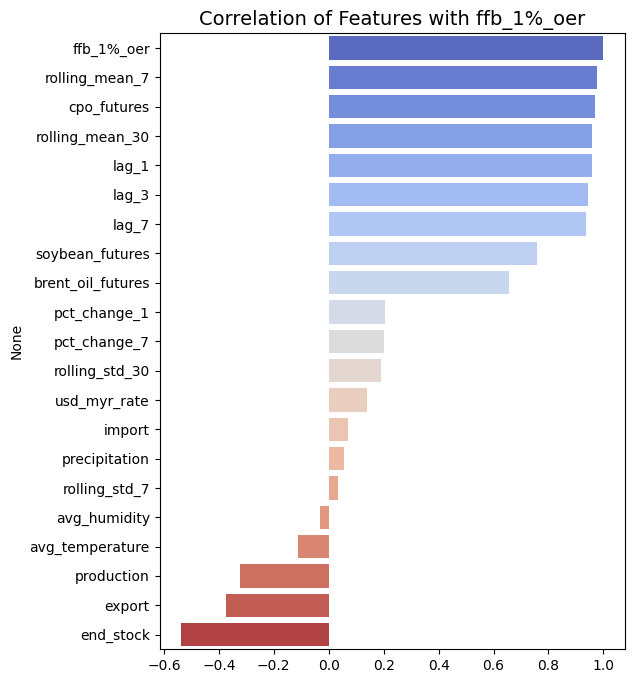

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
target = "ffb_1%_oer"
target_corr = corr[target].sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title(f"Correlation of Features with {target}", fontsize=14)
plt.show

In [31]:
import pandas as pd
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation higher than 0.9
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: ['cpo_futures', 'lag_1', 'lag_3', 'lag_7', 'rolling_mean_7', 'rolling_mean_30']


In [32]:
target = "ffb_1%_oer"
correlation_with_target = df.corr()[target].sort_values()

print(correlation_with_target)

end_stock           -0.538807
export              -0.373980
production          -0.324375
avg_temperature     -0.113021
avg_humidity        -0.030604
rolling_std_7        0.035287
precipitation        0.055821
import               0.071212
usd_myr_rate         0.139473
rolling_std_30       0.190311
pct_change_7         0.199708
pct_change_1         0.205156
brent_oil_futures    0.657629
soybean_futures      0.757836
lag_7                0.937610
lag_3                0.945275
lag_1                0.959023
rolling_mean_30      0.959578
cpo_futures          0.971083
rolling_mean_7       0.975949
ffb_1%_oer           1.000000
Name: ffb_1%_oer, dtype: float64


In [33]:
import numpy as np

#replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Fill Nans 
df['pct_change_1'].fillna(0, inplace=True)
df['pct_change_7'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_22856\296466551.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pct_change_1'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22856\296466551.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [34]:
from xgboost import XGBRegressor

X = df.drop(columns=[target])
y = df[target]

model = XGBRegressor()
model.fit(X, y)

# Get feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


rolling_mean_7       0.441917
lag_1                0.253286
soybean_futures      0.140778
cpo_futures          0.080281
rolling_mean_30      0.053831
pct_change_7         0.014127
pct_change_1         0.007209
lag_7                0.004485
import               0.002332
lag_3                0.000744
export               0.000512
rolling_std_7        0.000145
production           0.000099
rolling_std_30       0.000068
brent_oil_futures    0.000052
usd_myr_rate         0.000049
end_stock            0.000036
avg_temperature      0.000020
precipitation        0.000016
avg_humidity         0.000012
dtype: float32


In [35]:
df.dtypes

ffb_1%_oer           float64
import                 int64
export                 int64
production             int64
end_stock              int64
cpo_futures          float64
usd_myr_rate         float64
brent_oil_futures    float64
soybean_futures      float64
precipitation        float64
avg_temperature      float64
avg_humidity         float64
lag_1                float64
lag_3                float64
lag_7                float64
rolling_mean_7       float64
rolling_mean_30      float64
rolling_std_7        float64
rolling_std_30       float64
pct_change_1         float64
pct_change_7         float64
dtype: object

INVESTIGATING INVALID VALUES ISSUE (28 AUG:)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ffb_1%_oer,2308.0,3.752068e+01,12.572768,0.000000e+00,2.852500e+01,3.776500e+01,4.288250e+01,8.365000e+01
import,2308.0,7.719850e+04,42384.243642,1.096400e+04,4.755700e+04,6.897100e+04,1.012500e+05,2.820580e+05
export,2308.0,1.359066e+06,208133.647848,9.005580e+05,1.193917e+06,1.369351e+06,1.490043e+06,1.783284e+06
production,2308.0,1.567550e+06,212934.899994,1.108236e+06,1.411223e+06,1.606187e+06,1.740759e+06,1.937224e+06
end_stock,2308.0,1.900517e+06,369802.481445,1.264881e+06,1.643974e+06,1.817061e+06,2.194809e+06,3.056929e+06
cpo_futures,2308.0,3.819392e+03,1160.738404,1.865000e+03,2.932000e+03,3.884000e+03,4.327000e+03,8.163000e+03
usd_myr_rate,2308.0,4.342407e+00,0.216984,4.004000e+00,4.159500e+00,4.287000e+00,4.482000e+00,4.795000e+00
brent_oil_futures,2308.0,7.325643e+01,18.505329,1.933000e+01,6.364000e+01,7.437000e+01,8.403000e+01,1.279800e+02
soybean_futures,2308.0,4.811450e+01,14.631877,2.534000e+01,3.334000e+01,4.740000e+01,6.082250e+01,8.660000e+01
precipitation,2308.0,1.130533e+01,13.203939,0.000000e+00,2.000000e+00,7.600000e+00,1.612500e+01,1.355000e+02


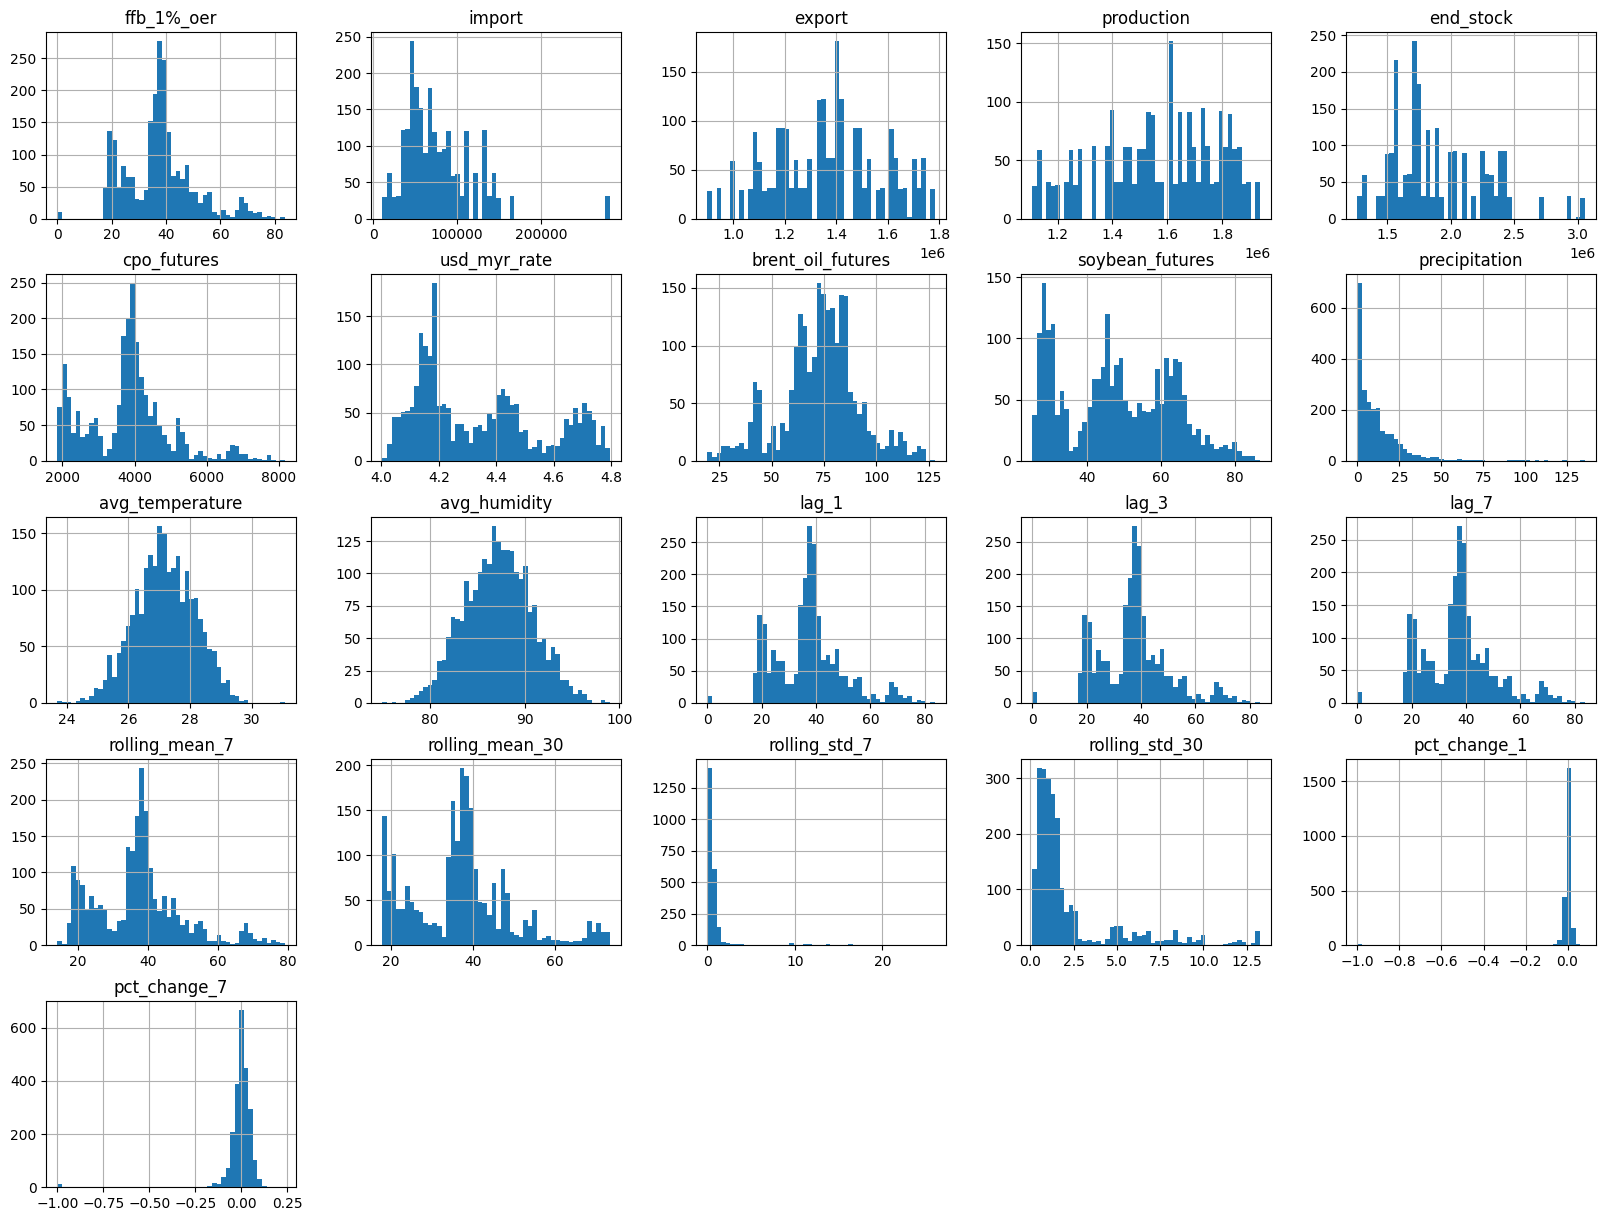

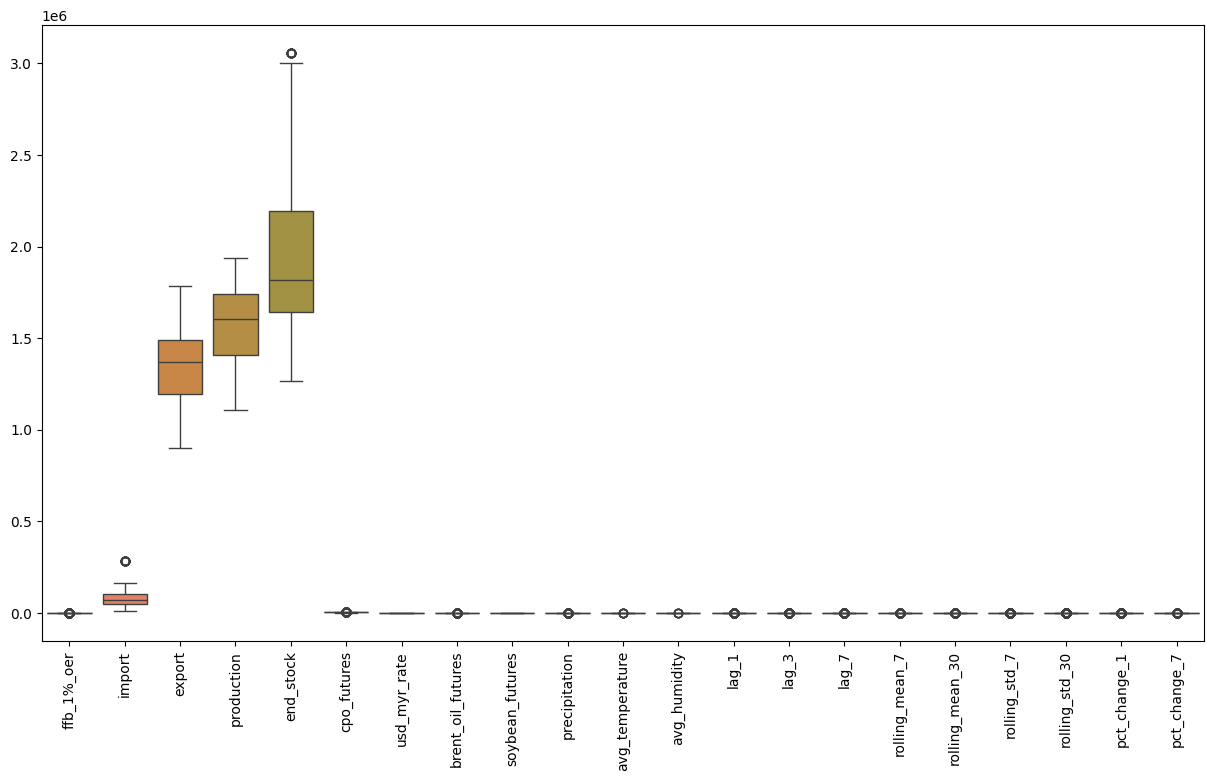

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [38]:
df['ffb_1%_oer'].describe().T

count    2308.000000
mean       37.520685
std        12.572768
min         0.000000
25%        28.525000
50%        37.765000
75%        42.882500
max        83.650000
Name: ffb_1%_oer, dtype: float64

In [39]:
(df['ffb_1%_oer'] == 0).sum()

np.int64(11)

Forward fill ffb price column

In [40]:
df["ffb_1%_oer"] = df["ffb_1%_oer"].replace(0, np.nan)  # mark 0 as missing
df["ffb_1%_oer"] = df["ffb_1%_oer"].fillna(method="ffill")  # forward fill

C:\Users\User\AppData\Local\Temp\ipykernel_22856\4234568169.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["ffb_1%_oer"] = df["ffb_1%_oer"].fillna(method="ffill")  # forward fill


In [41]:
df['ffb_1%_oer'].describe().T

count    2308.000000
mean       37.687409
std        12.321775
min        17.700000
25%        28.950000
50%        37.790000
75%        43.077500
max        83.650000
Name: ffb_1%_oer, dtype: float64

In [42]:
(df['ffb_1%_oer'] == 0).sum()

np.int64(0)

Save processed dataframe 

In [43]:
df.to_parquet("cleaned_data.parquet", index=False)